## Lasso Regresyon Modeli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, ms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [3]:
from sklearn.linear_model import Lasso

In [4]:
lasso_model = Lasso(alpha= 0.1).fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  positive)


In [5]:
lasso_model 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935673922, tolerance: 3898.686956380

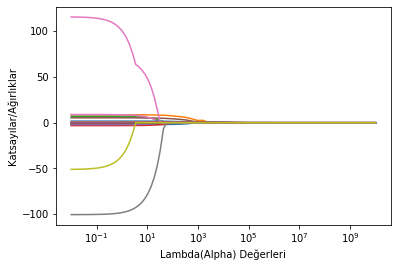

In [7]:
lasso = Lasso()
lambdalar = 10**np.linspace(10, -2, 100)*0.5
katsayilar = []

for i in lambdalar:
    
    lasso.set_params(alpha= i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar");

### TAHMİN

In [18]:
y_pred = lasso_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

### Model Tuning

In [10]:
from sklearn.linear_model import LassoCV

In [11]:
lasso_cv_model = LassoCV(alphas= None, cv=10, max_iter= 10000, normalize= True )

In [12]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [13]:
lasso_cv_model.alpha_

0.39406126432470073

In [14]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_)

In [15]:
lasso_tuned.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  positive)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

# Final Modelin test hatası

356.5226376958367